In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns



In [2]:
df=pd.read_csv("data_proyecto.csv")
df

,antiguedad,precio,banios,numero_estacionamientos,elevador,superficie_construida,superficie_terreno_vivienda,localidad
0,3,2810865.60,1.0,1,1,45.72,5.13,Alvaro Obregon
1,25,1773000.00,1.0,1,1,57.77,27.00,Alvaro Obregon
2,44,1118502.00,1.0,0,0,56.49,21.00,Alvaro Obregon
3,40,1520000.00,1.0,0,0,62.39,22.00,Alvaro Obregon
4,35,1457000.00,1.0,1,0,63.40,107.14,Alvaro Obregon
...,...,...,...,...,...,...,...,...
1567403,9,3573861.27,8.0,0,0,236.99,91.27,Querétaro
1567404,14,4372700.00,8.0,2,0,310.12,300.00,Huimilpan
1567405,15,37443652.22,9.0,4,1,716.85,918.27,Monterrey
1567406,3,22296700.00,9.0,3,0,260.78,1345.10,Mérida


In [3]:
df.isnull().sum()

antiguedad                     0
precio                         0
banios                         0
numero_estacionamientos        0
elevador                       0
superficie_construida          0
superficie_terreno_vivienda    0
localidad                      0
dtype: int64

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1567408 entries, 0 to 1567407
Data columns (total 8 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   antiguedad                   1567408 non-null  int64  
 1   precio                       1567408 non-null  float64
 2   banios                       1567408 non-null  float64
 3   numero_estacionamientos      1567408 non-null  int64  
 4   elevador                     1567408 non-null  int64  
 5   superficie_construida        1567408 non-null  float64
 6   superficie_terreno_vivienda  1567408 non-null  float64
 7   localidad                    1567408 non-null  str    
dtypes: float64(4), int64(3), str(1)
memory usage: 112.4 MB


In [23]:
print(df.shape)
df.describe()


(1567408, 8)


,antiguedad,precio,banios,numero_estacionamientos,elevador,superficie_construida,superficie_terreno_vivienda
count,1.567408e+06,1.567408e+06,1.567408e+06,1.567408e+06,1.567408e+06,1.567408e+06,1.567408e+06
mean,1.360213e+01,1.874572e+06,1.721224e+00,1.143799e+00,4.829502e-02,8.823024e+01,1.013694e+02
std,2.648662e+01,3.010148e+06,9.829948e-01,7.248128e-01,2.143890e-01,6.901559e+01,2.843030e+02
min,-8.300000e+01,1.581000e+04,5.000000e-01,0.000000e+00,0.000000e+00,2.780000e+00,1.000000e-02
25%,5.000000e+00,6.230000e+05,1.000000e+00,1.000000e+00,0.000000e+00,5.075000e+01,5.435000e+01
50%,8.000000e+00,1.019918e+06,1.500000e+00,1.000000e+00,0.000000e+00,6.533000e+01,8.130000e+01
75%,2.000000e+01,2.109791e+06,2.000000e+00,1.000000e+00,0.000000e+00,1.011000e+02,1.087500e+02
max,2.026000e+03,3.928537e+08,3.700000e+01,6.000000e+01,1.000000e+00,9.530000e+03,1.704825e+05


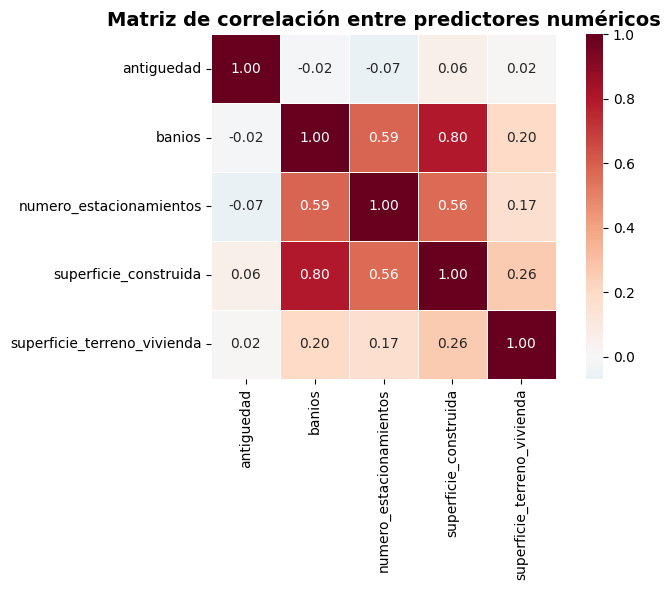

In [6]:
# Correlograma: matriz de correlación + heatmap (multicolinealidad)
cols_num = ['antiguedad', 'banios', 'numero_estacionamientos', 'superficie_construida', 'superficie_terreno_vivienda']
corr_mat = df[cols_num].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax)
ax.set_title('Matriz de correlación entre predictores numéricos', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


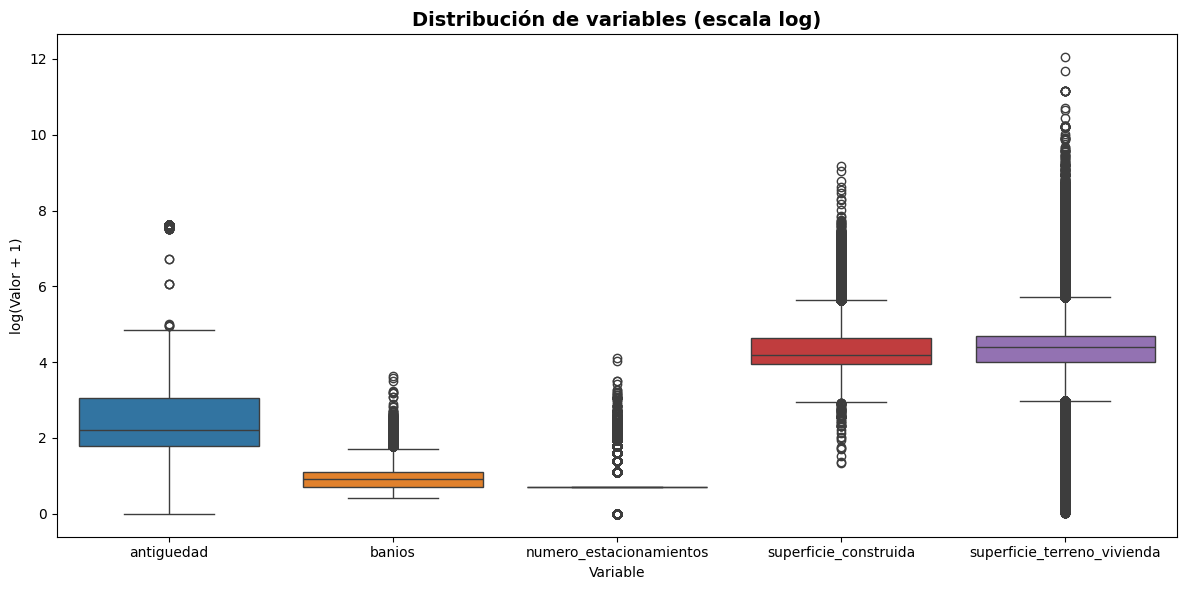

In [24]:
cols_num = [
    'antiguedad',
    'banios',
    'numero_estacionamientos',
    'superficie_construida',
    'superficie_terreno_vivienda'
]

eda_lags = df[cols_num].melt(var_name='Variable', value_name='Valor')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(
    data=eda_lags,
    x='Variable',
    y=np.log1p(eda_lags['Valor']),   # escala log
    hue='Variable',
    legend=False
)

ax.set_title('Distribución de variables (escala log)', fontsize=14, fontweight='bold')
ax.set_ylabel('log(Valor + 1)')

plt.tight_layout()
plt.show()

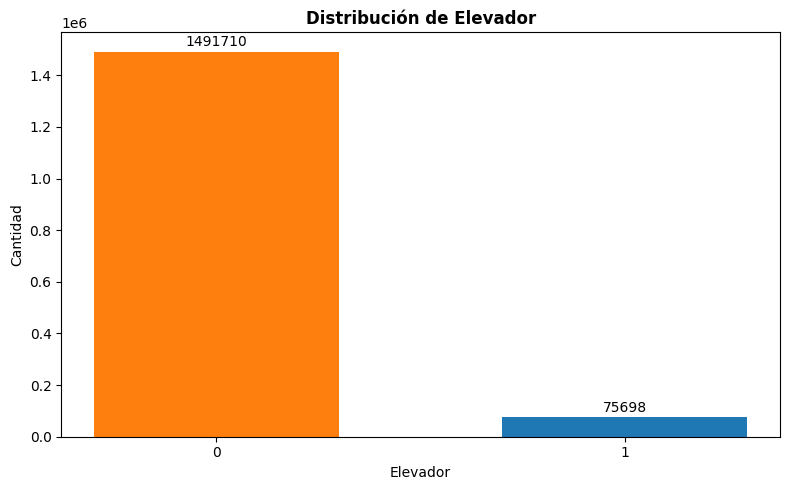

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))

urban = df['elevador'].value_counts().sort_index()
ax.bar(urban.index, urban.values, color=['#ff7f0e', '#1f77b4'], width=0.6)
ax.set_title('Distribución de Elevador', fontsize=12, fontweight='bold')
ax.set_xlabel('Elevador')
ax.set_ylabel('Cantidad')
ax.set_xticks([0, 1])
for i, v in enumerate(urban.values):
    ax.text(i, v + 20000, str(v), ha='center')
plt.tight_layout()
plt.show()

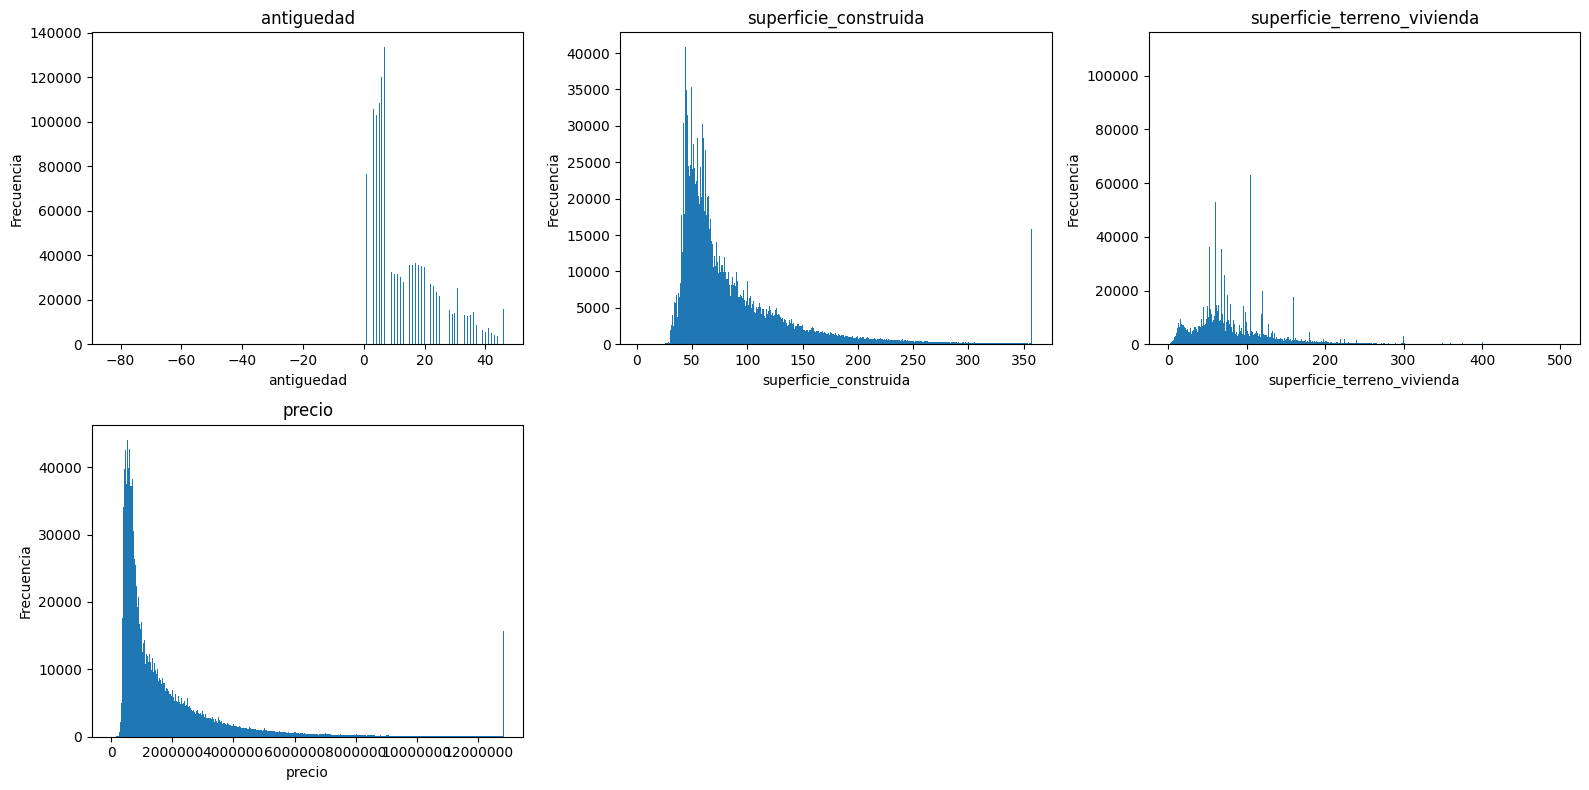

In [30]:

# Variables a graficar
cols = [
    'antiguedad',
    'superficie_construida',
    'superficie_terreno_vivienda',
    'precio'
]

# Recorte superior para que se vea la distribución (evita que outliers aplasten el histograma)
p = 0.99  

# Layout: 2 filas x 3 columnas (mucho más legible que 1x6)
ncols = 3
nrows = int(np.ceil(len(cols) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    x = df[col].dropna()

    # Recorte (solo cola superior)
    upper = x.quantile(p)
    x_clip = x.clip(upper=upper)

    axes[i].hist(x_clip, bins="fd")  # bins robustos
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].ticklabel_format(style="plain", axis="x")  # evita notación científica en X

# Apaga ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()